Author: Lynn Menchaca

Date: 12Dec2022

Project: Mental Health Classifier from Tweets

The purpose of this project is to gain exposure to unbalanced data. Two separate sets of models will be used with this data set. One for binary classification predicting if it will rain (feature rain_today). The second will be for regression predicting how much it will rain (feature rainfall).

Resources:

- Kaggle Data Set: Houston Weather Data
    - https://www.kaggle.com/datasets/alejandrochapa/houston-weather-data
- Kaggle Data Set: Houston Weather - 2020 - 21 - Rain Hours Prediction
    - https://www.kaggle.com/datasets/praxisart/houston-weather-202021-rain-hours-prediction

### Project Overview

### Exploratory Data Analysis
- Initial Overview: size, collumns, data types, missing values
- Convert the number imported as object data in to numeric data.


### Feature Engineering and Machine Learning Models:
- Bag of Words Model (Convert strings to a matrix)
    - Count Vectorizer with Tfidf Transformation
    - Tfidf Vectorizer
    - Hashing Vectorizer
- Dependant (X) and Independent (y) variables
- Train Test Split
- ML Models with Hyperparameter Tuning
    - Multinomial NM Algorithm
    - Passivie Aggressive Classifer
    - Linear Support Vector Machine
    - Logistic Regression

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Data Frames

data_file_path = '/Users/lynnpowell/Documents/DS_Projects/Data_Files/Houston_Weather_Data/'

#The Houston weather data covers years from 2010 to 2021
#appending each year of weather data to create one large data file

weather_files = []

for year in range(2010, 2022):
    data_file = data_file_path+'htx_'+str(year)+'_weather.csv'
    
    try:
        df = pd.read_csv(data_file, index_col=None, header=0)
    except OSError:
        print(str(year), " year has no data")
        continue
    weather_files.append(df)
    
df_weather = pd.concat(weather_files, ignore_index=True)
df_weather.head()

2016  year has no data
2017  year has no data
2020  year has no data


,date,min_temp,max_temp,rainfall,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,rain_today,rain_tomorrow
0,2010-01-01,43.0,55.0,0.0,15.0,15.0,76.0,40.0,30.4,30.31,Cloudy,Fair,43.0,55.0,No,No
1,2010-01-02,35.0,53.0,0.0,5.0,7.0,76.0,28.0,30.35,30.24,Mostly Cloudy,Mostly Cloudy,44.0,52.0,No,No
2,2010-01-03,43.0,48.0,0.0,14.0,9.0,71.0,68.0,30.21,30.17,Cloudy,Cloudy,43.0,48.0,No,No
3,2010-01-04,36.0,48.0,0.0,15.0,14.0,70.0,42.0,30.37,30.35,Cloudy,Fair,41.0,48.0,No,No
4,2010-01-05,30.0,49.0,0.0,9.0,5.0,61.0,37.0,30.47,30.34,Fair,Partly Cloudy,35.0,48.0,No,No


In [3]:
#size of data frame and type of data for each feature
print('data size: ', df_weather.shape)
print(df_weather.dtypes)

data size:  (3286, 16)
date              object
min_temp         float64
max_temp         float64
rainfall         float64
wind_speed9am     object
wind_speed3pm     object
humidity9am       object
humidity3pm       object
pressure9am       object
pressure3pm       object
cloud9am          object
cloud3pm          object
temp9am           object
temp3pm           object
rain_today        object
rain_tomorrow     object
dtype: object


In [4]:
#number of missing values for each feature

df_weather.isnull().sum()

date             0
min_temp         0
max_temp         0
rainfall         0
wind_speed9am    0
wind_speed3pm    0
humidity9am      0
humidity3pm      0
pressure9am      0
pressure3pm      0
cloud9am         0
cloud3pm         0
temp9am          0
temp3pm          0
rain_today       0
rain_tomorrow    0
dtype: int64


There is no missing data.


What the data type should be:

M8[ns] -> date

numeric -> min_temp, max_temp, rainfall, wind_speed9am, wind_speed3pm, humidity9am, humidity3pm, pressure9am, pressure3pm, temp9am, temp3pm

object -> cloud9am, cloud3pm, rain_today, rain_tomorrow

In [5]:
#convert object to date

df_weather['date'] = pd.to_datetime(df_weather['date'])
print('date data type: ', df_weather['date'].dtype)
print('\n')
print(df_weather['date'].head())

date data type:  datetime64[ns]


0   2010-01-01
1   2010-01-02
2   2010-01-03
3   2010-01-04
4   2010-01-05
Name: date, dtype: datetime64[ns]


In [17]:
df_weather['year'] = df_weather['date'].dt.year
df_weather['month'] = df_weather['date'].dt.month
df_weather['day'] = df_weather['date'].dt.day
df_weather[['year', 'month', 'day']].head()

,year,month,day
0,2010,1,1
1,2010,1,2
2,2010,1,3
3,2010,1,4
4,2010,1,5


In [7]:
#conver object to float data type
#already float data type: min_temp, max_temp, rainfall

float_cols = ['wind_speed9am', 'wind_speed3pm', 'humidity9am', 'humidity3pm', 
        'pressure9am', 'pressure3pm', 'temp9am', 'temp3pm']

df_weather[float_cols] = df_weather[float_cols].apply(pd.to_numeric, errors='coerce')
print(df_weather[float_cols].dtypes)
print('\n')
df_weather[float_cols].head()

wind_speed9am    float64
wind_speed3pm    float64
humidity9am      float64
humidity3pm      float64
pressure9am      float64
pressure3pm      float64
temp9am          float64
temp3pm          float64
dtype: object




,wind_speed9am,wind_speed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,temp9am,temp3pm
0,15.0,15.0,76.0,40.0,30.40,30.31,43.0,55.0
1,5.0,7.0,76.0,28.0,30.35,30.24,44.0,52.0
2,14.0,9.0,71.0,68.0,30.21,30.17,43.0,48.0
3,15.0,14.0,70.0,42.0,30.37,30.35,41.0,48.0
4,9.0,5.0,61.0,37.0,30.47,30.34,35.0,48.0


In [8]:
# EDA numeric data by month for each year

num_col = [feat for feat in df_weather.columns if df_weather[feat].dtype == 'float64']
#removing rain since I was that to be my dependant feature
num_col.remove('rainfall')

#print(num_col)

#separating the 9am data and the 3pm data
num_col_9 = [feat for feat in num_col if '3' not in feat]
print('9am features: ', num_col_9)
num_col_3 = [feat for feat in num_col if '9' not in feat]
print('3pm features: ', num_col_3)

9am features:  ['min_temp', 'max_temp', 'wind_speed9am', 'humidity9am', 'pressure9am', 'temp9am']
3pm features:  ['min_temp', 'max_temp', 'wind_speed3pm', 'humidity3pm', 'pressure3pm', 'temp3pm']


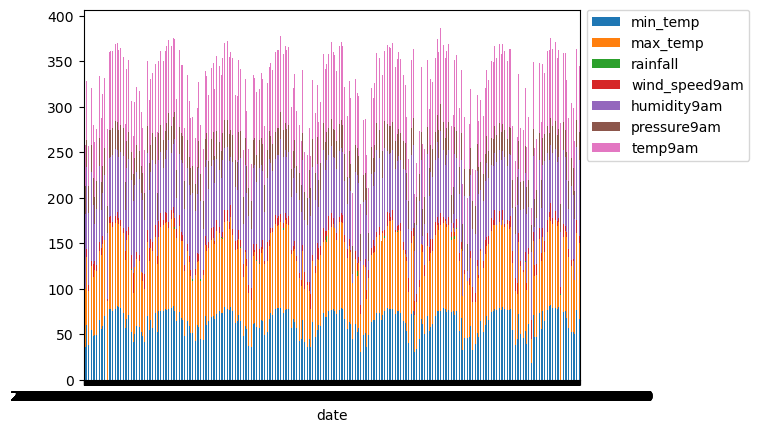

In [34]:
#Ploting the 9 am features

ax = df_weather.plot(x="date", y=num_col_9, kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

In [45]:
df_year = df_weather[df_weather==2010]
df_year = df_year.groupby(['month'], as_index=False).sum()
df_year['month']

Series([], Name: month, dtype: float64)

Empty DataFrame
Columns: [month, min_temp, max_temp, rainfall, wind_speed9am, wind_speed3pm, humidity9am, humidity3pm, pressure9am, pressure3pm, temp9am, temp3pm, year, day]
Index: []


IndexError: index 0 is out of bounds for axis 0 with size 0

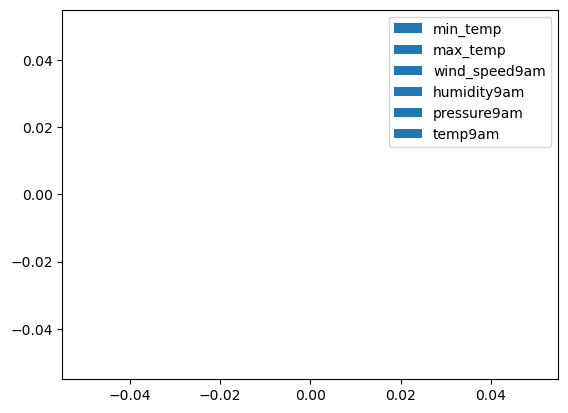

In [44]:
for year in range(2010, 2022):
    if year in df_weather['year']:
        df_year = df_weather[df_weather==year]
        df_year = df_year.groupby(['month'], as_index=False).sum()
        print(df_year.tail())
        ax = df_year.plot(x='month', y=num_col_9, kind="bar", rot=0, stacked=True)
        _ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')
        plt.show()
    else:
        continue
    
    #plt.show()

In [ ]:
ax = df_weather.plot(x="date", y="A", kind="bar", rot=0)
df_weather.plot(x="date", y="B", kind="bar", ax=ax, color="C2", rot=0)
df_weather.plot(x="X", y="C", kind="bar", ax=ax, color="C3", rot=0)

for year in range(2010, 2022):
    if year is in df_weather['year']:
        df_year = df_weather[df_weather['year']==year]
        
        for feat in num_col_9:
            
        
    else:
        continue
    
    plt.show()